In [3]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Sometimes it is really difficult to give point estimate of our statistic(mean, std-dev,var,median, etc). for such instances we use bootstrapping techniques which uses the computing power of our system and gives us the confidence interval(C.I).
if i say my mean lies in [161,171] with 95% CI This means that if I repeat my sampling experiment 100 times, mean comes in the range mentioned 95 times.

If I know mean and std_dev then we can make use of Central Limit theorem and calculate the confidence Interval.

But for the case when mean and std_dev is unknown then we can use Bootstarpping technique to calculate our CI.
suppose I have a sample X of sample size(n)= 10 contains heights of student.
we will use this sample to calculate CI for median.

we generate sample(x[m] using the sample X such that m<=n, this is a random sample generated from sample X.
 here this sampling is with repetition. This is done using resample method in sklearn.
                   
similar to above method we generate k random samples known as bootstrap sample and we now calculate medians of each of these samples.
Now, we have k medians , which we sort them and take CI using percentiles                   
like if i want 95% CI then I will take 2.5 percentile and 97.5 Percentile.
                   

In [16]:
x = np.array([180,162,158,172,168,150,171,183,165,176])
# this is my orifinal samples.
n_iterations = 1000 # this is no of sampling experiments i want to perform.(K)
sample_size = int(len(x)) #this is the size of my bootstarp sample.(m)
medians = list() # this variable will hold all my k=1000 medians

for i in range(n_iterations):
    s = resample(x,n_samples=sample_size) # performing a sampling experiment
    m = np.median(s) # calculating the mean
    medians.append(m) # appending in the list
    
# Now I have list median which have 1000 medians on which we will calc CI using percentiles.


In [17]:
len(medians)

1000

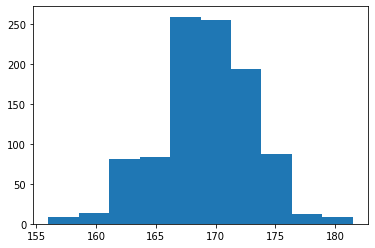

In [11]:
plt.hist(medians)
plt.show()

In [18]:
accuracy_alpha=0.95 # confidence I want in the range
upper=(accuracy_alpha+((1-accuracy_alpha)/2))*100 # calculation for upperlimit of CI
up = np.percentile(medians,upper)
lower = ((1-accuracy_alpha)/2)*100 # calculation for lower limit of CI
lo = np.percentile(medians,lower)

In [20]:
print(lo,up)# This is my CI for 95% accuracy of median.

161.5 176.0


This confidence interval is wider because our original sample size is small, if it is larger this interval seems to converge to a short interval.